# Chapter 11
## Section 11.1 Preprocessing Data

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = ''' In the town of Athy one Jeremy Lanigan Battered away til he hadnt a pound.
His father died and made him a man againLeft him a farm and ten acres of ground.
He gave a grand party for friends and relations Who didnt forget him when come to the wall, And if youll but listen I1l make your eyes glisten of the rows and the ructions of Lanigan's Ball.
Myself to be sure got free invitation, For all the nice girls and boys I might ask, And just in a minute both friends and relations Were dancing round merry as bees round a cask.
Judy ODaly, that nice little milliner, She tipped me a wink for to give her a call, And I soon arrived with Peggy McGilligan Just in time for Lanigans Ball.'''.lower().split('\n')

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index)+1

input_sequence = []

for line in data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        input_sequence.append(token_list[:i+1])

max_sequence_len = max([len(x) for x in input_sequence])
input_sequence = np.array(pad_sequences(input_sequence, maxlen=max_sequence_len, padding='pre'))

xs = input_sequence[:,:-1]
labels = input_sequence[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

## Chpater 11.2

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 64, input_length = max_sequence_len - 1))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)))
model.add(tf.keras.layers.Dense(total_words, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(xs,ys, epochs = 500, verbose = 1)

=======================] - 1s 70ms/step - loss: 1.4620 - accuracy: 0.7659
Epoch 302/500
5/5 [==============================] - 0s 67ms/step - loss: 1.4857 - accuracy: 0.7217
Epoch 303/500
5/5 [==============================] - 0s 67ms/step - loss: 1.4762 - accuracy: 0.6852
Epoch 304/500
5/5 [==============================] - 0s 68ms/step - loss: 1.4605 - accuracy: 0.7000
Epoch 305/500
5/5 [==============================] - 0s 107ms/step - loss: 1.4486 - accuracy: 0.6982
Epoch 306/500
5/5 [==============================] - 0s 68ms/step - loss: 1.4481 - accuracy: 0.7086
Epoch 307/500
5/5 [==============================] - 1s 116ms/step - loss: 1.3996 - accuracy: 0.7520
Epoch 308/500
5/5 [==============================] - 1s 162ms/step - loss: 1.4117 - accuracy: 0.7034
Epoch 309/500
5/5 [==============================] - 1s 114ms/step - loss: 1.4231 - accuracy: 0.7169
Epoch 310/500
5/5 [==============================] - 0s 93ms/step - loss: 1.4118 - accuracy: 0.7099
Epoch 311/500
5/5 [===

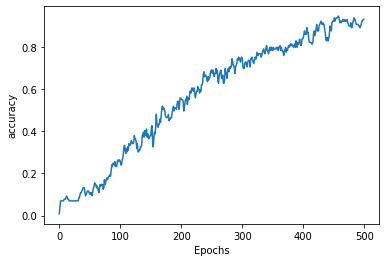

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.show()
plot_graphs(history, 'accuracy')

In [14]:
seed_text = 'Laurence went to dublin'
next_words = 200

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_sequence_len - 1, padding = 'pre')
    predicted = model.predict_classes(token_list, verbose = 0)
    for word, index in tokenizer.word_index.items():
        if index==predicted:
            output_word = word
            break
    seed_text += " "+output_word
print(seed_text)

Laurence went to dublin odaly that nice little milliner she tipped me a wink for to her a a call and i soon arrived with peggy mcgilligan just in time for lanigans ball ball ball round a cask a cask cask cask cask acres of ground lanigan's ball lanigan's ball lanigan's as ball round lanigan's ball lanigan's ball lanigan's as bees round a cask cask cask cask cask a listen with your eyes glisten of the the the ball ball ball ball ball ball ball ball ball ball ball ball ball ball ball ball ball ball ball battered pound he pound acres give her a call with peggy mcgilligan just in time for lanigans ball ball ball round a cask cask cask cask cask cask cask round a i1l i1l soon eyes eyes glisten of the rows and the ructions of lanigan's ball ball ball ball round lanigan's ball ball round a cask cask cask acres of lanigan's ball as ball ball ball ball ball odaly cask farm didnt againleft him a farm and ten in just in of lanigans ball ball ball round a cask cask cask cask cask round a cask but 